In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

#from bokeh.charts import BoxPlot, show
#from bokeh.io import push_notebook,show,output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure 
#output_notebook()
sns.set_context("poster") # this makes things BIG for the poster 


%matplotlib inline


In [2]:
%qtconsole

In [3]:
mat1 = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_1.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse.mat',squeeze_me=1)
#mat5
mat6 = loadmat('2fd831_compareResponse_block_1.mat',squeeze_me=1)
mat7 = loadmat('2fd831_compareResponse_block_2.mat',squeeze_me=1)


In [4]:
respLo = mat1['respLo']
respHi = mat1['respHi']
button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']
button6 = mat6['buttonLocs']
button7 = mat7['buttonLocs']


In [5]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}

a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}

a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}

a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}

your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}

a= np.arange(0,button6.shape[0])
ndata6 = {n: 1e3*button6[n] for n in a}

a = np.arange(0,button7.shape[0])
ndata7 = {n: 1e3*button7[n] for n in a}

# IT looks like have to modify ndata6,7 slightly... pad with nan for now - 3-27-2017 DJC 
ndata6[1] = np.append(ndata6[1],np.nan)
ndata7[1] = np.append(ndata7[1],np.nan)

# THIS IS WRONG BELOW 
#ndata7[0] = np.append(ndata7[0],np.nan)



In [9]:
ndata6

{0: array([ 1908.9408 ,   508.39552,   182.02624,   154.50112,   306.25792,
          203.28448,   223.88736,   171.74528,   217.12896,   160.44032,
          177.84832,   186.5728 ,   195.7888 ,   245.18656,   175.88224,
          201.19552,   189.97248,   557.99808,   107.15136,   214.17984]),
 1: array([        nan,         nan,         nan,         nan,  3050.20928,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan]),
 2: array([ 3426.0992,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan]),
 3: array([ 217.62048,        nan,  221.10208,        nan,        nan,
               nan,        nan,        nan,        nan,   

In [6]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')

dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')

dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')

dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')

dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['tactor'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])

dataFdict6 = pd.DataFrame.from_dict(ndata6,orient='columns')

dataFdict7 = pd.DataFrame.from_dict(ndata7,orient='columns')


In [7]:
dataFdict1.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict6.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict7.columns = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

In [8]:
dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = '693ffd'
dataMelt1['Subject'] = '3'

dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = '693ffd'
dataMelt2['Subject'] = '3'

dataMelt2['block'] = '2'
             
dataMelt3 = pd.melt(dataFdict3)
#dataMelt3['Subject'] = 'c19968'
dataMelt3['Subject'] = '2'

dataMelt3['block'] = '1'



dataMelt4 = pd.melt(dataFdict4)
#dataMelt4['Subject'] = 'c19968'
dataMelt4['Subject'] = '2'

dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
#dataMelt5['Subject'] = 'acabb1'
dataMelt5['Subject'] = '1'


dataMelt5['block'] = '1'

#### latest subject - 3-27-2017 DJC 

dataMelt6 = pd.melt(dataFdict6)
#dataMelt6['Subject'] = '2fd831'
dataMelt6['Subject'] = '4'

dataMelt6['block'] = '1'

dataMelt7 = pd.melt(dataFdict7)
#dataMelt7['Subject'] = '2fd831'
dataMelt7['Subject'] = '4'

dataMelt7['block'] = '2'

In [9]:
dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)

### DJC - 3-27-2017 newest subject 
dataMelt6.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt7.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
#dataMelt4
#dataMelt5

In [10]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5,dataMelt6,dataMelt7]
#frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]
resultTrim.groupby(['experiment','Subject','block']).mean()
#resultTrim
#resultNoNa = result.dropna()
#resultNoNa

experimentsOfInt = ['tactor','100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]

# subtract off 1.08 ms for tactor 
dataCleaned[dataCleaned['experiment']
dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['experiment','Subject']).describe()
dataCleaned.groupby(['Subject','experiment']).mean()
dataCleaned.groupby(['Subject','experiment']).std()

response time (ms)
Subject experiment                    
1       200 ms               89.842130
        tactor              116.661296
2       100 ms               86.584928
        200 ms               33.298605
        400 ms               42.093665
        800 ms               55.556912
        tactor              101.329155
3       100 ms                     NaN
        200 ms               86.369396
        400 ms               98.310737
        800 ms              195.646368
        tactor              108.666317
4       100 ms              327.805076
        200 ms              186.946582
        400 ms              151.860477
        800 ms              189.005181
        tactor              117.836873

In [14]:
dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)  block
Subject experiment                           
1       200 ms                      85     85
        tactor                      66     66
2       100 ms                      36     36
        200 ms                      40     40
        400 ms                      40     40
        800 ms                      40     40
        tactor                      40     40
3       100 ms                       1      1
        200 ms                      10     10
        400 ms                      25     25
        800 ms                      31     31
        tactor                      39     39
4       100 ms                       3      3
        200 ms                      13     13
        400 ms                      17     17
        800 ms                      22     22
        tactor                      24     24

In [13]:
resultTrim

,experiment,response time (ms),Subject,block
1,tactor,506.75712,3,1
2,tactor,477.06112,3,1
3,tactor,150.65088,3,1
4,tactor,300.76928,3,1
5,tactor,155.89376,3,1
6,tactor,131.72736,3,1
7,tactor,152.49408,3,1
8,tactor,176.37376,3,1
9,tactor,181.86240,3,1
10,tactor,119.39840,3,1


In [12]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

A Jupyter Widget

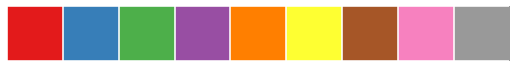

In [13]:
sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

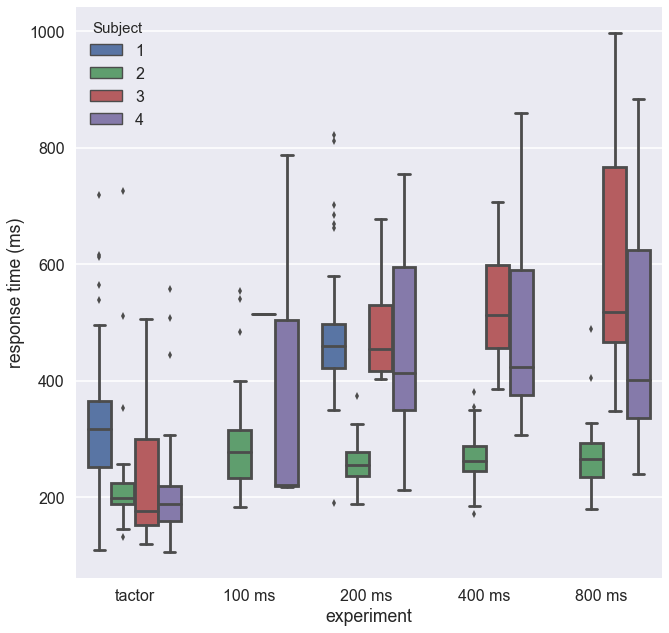

In [90]:
#frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])

#frame1.axes.get_xaxis().set_visible(False)
#frame1.legend(resultTrim.experiment)
fig1 = plt.gcf()
#fig1.suptitle('Reaction times for different experimental conditions')
fig1.set_size_inches(10.5, 10.5)
#fig1.savefig('responseTimesBySID.svg', dpi=600)

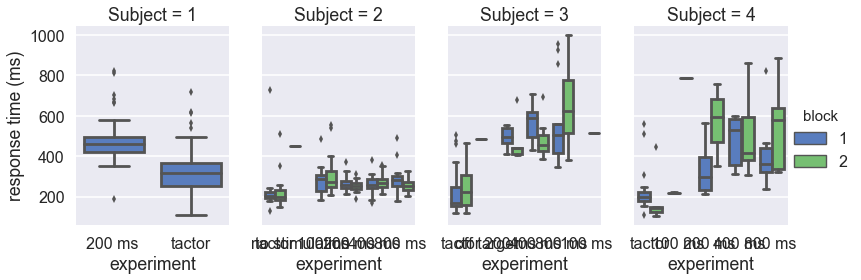

In [83]:
g = sns.FacetGrid(resultTrim,col="Subject",size=4,aspect=0.7,sharex=False)
(g.map(sns.boxplot, "experiment","response time (ms)","block",palette="muted")
 .despine(left=True)
 .add_legend(title="block"))
#fig2 = plt.gcf()
#fig2.set_size_inches(18.5, 10.5)
#fig2.savefig('responseTimesByBlock.svg', dpi=600)

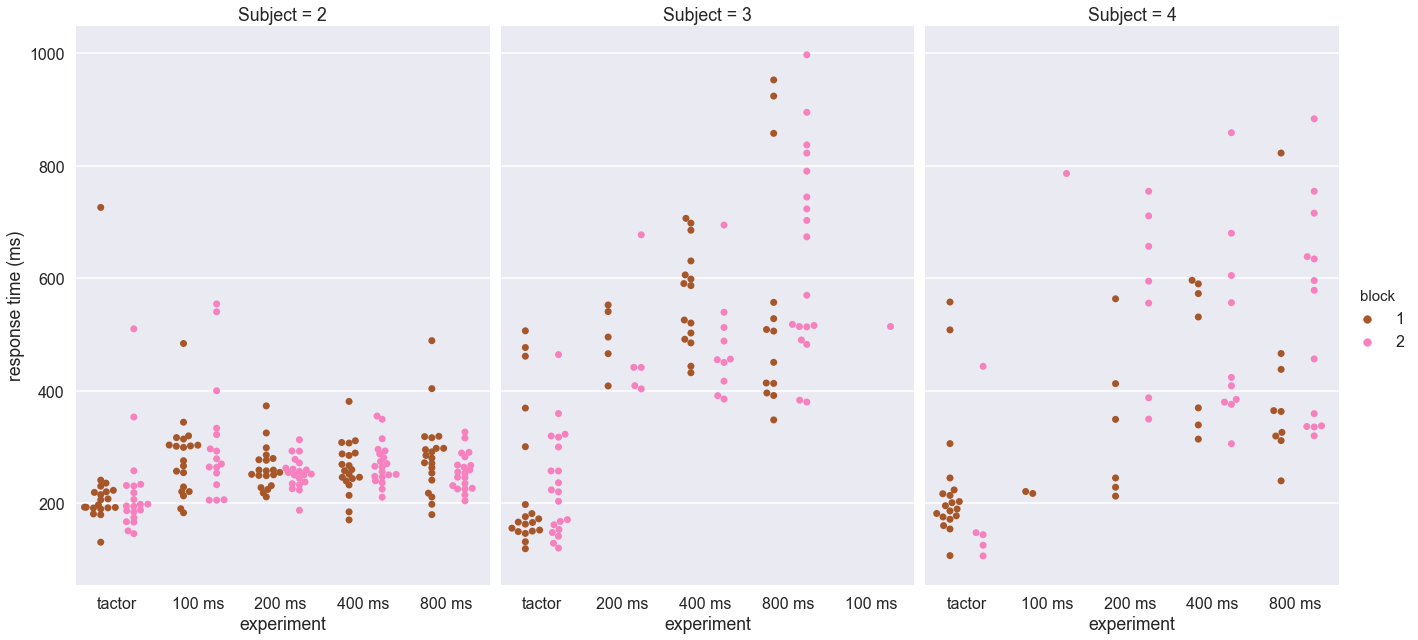

In [84]:
#frame4 = sns.FacetGrid(resultTrim,col="Subject",size=5,aspect=0.7,sharex=False)
resultTrim
frame4 = sns.FacetGrid(dataCleaned,col="Subject",size=9,aspect=0.7,col_order=['2','3','4'],sharex=False)

(frame4.map(sns.swarmplot,"experiment","response time (ms)","block",dodge="True",palette=color_pal_2_v2,size=7)
 .despine(left=True)
 .add_legend(title="block")
)
fig3 = plt.gcf()
#fig3.set_size_inches(18.5, 10.5)
#fig3.savefig('swarmByBlock_4subj.svg', dpi=600)

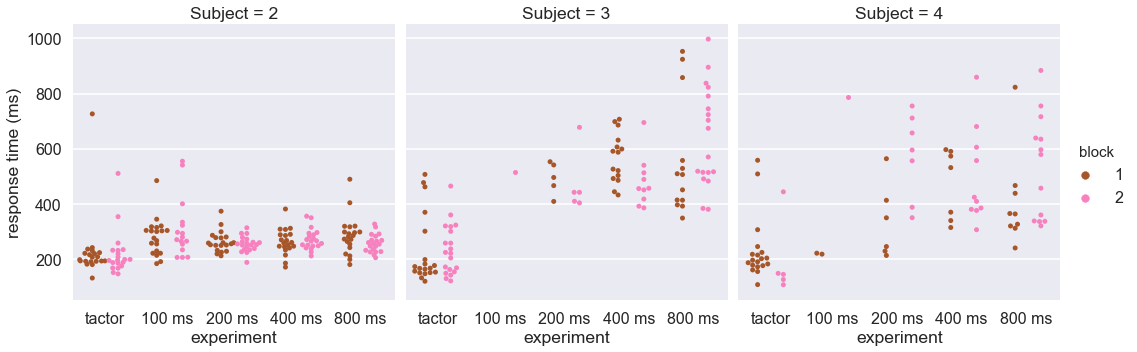

In [15]:
g = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '],
...                   palette=color_pal_2_v2)
g.savefig('swarmByBlockSplit_subj4.svg', dpi=600)

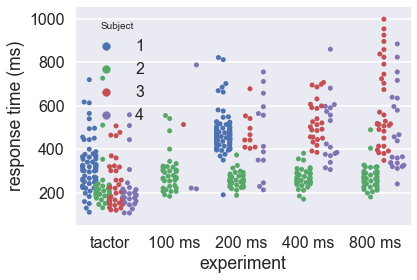

In [86]:
#frame5 = sns.swarmplot(x = 'experiment',y='response time (ms)',hue='Subject',data = resultTrim, split="True",order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame5 = sns.swarmplot(x = 'experiment',y='response time (ms)',hue='Subject',data = resultTrim, split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
fig5 = plt.gcf()
handles, labels = frame5.get_legend_handles_labels()

frame5.legend(handles, labels, loc="upper left", title="Subject")

#plt.legend(loc='upper left')


#fig.set_size_inches(18.5, 10.5)
#fig5.savefig('swarmSID.svg', dpi=600)

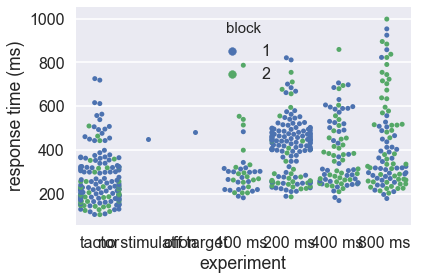

In [87]:
#frame6 = sns.boxplot(x = 'experiment',y='response times',hue='Subject',data = resultTrim,order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])
frame6 = sns.swarmplot(x = 'experiment',y='response time (ms)',data = resultTrim,hue='block',order=['tactor','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms '])

#frame6 = sns.swarmplot(x = 'experiment',y='response time (ms)',data = resultTrim,hue='block',order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
fig6 = plt.gcf()
#fig5.savefig('swarmBLOCK.svg', dpi=600)
#frame6 = sns.swarmplot(x = 'experiment',y='response times',data = resultTrim,hue='Subject',color="0.1")

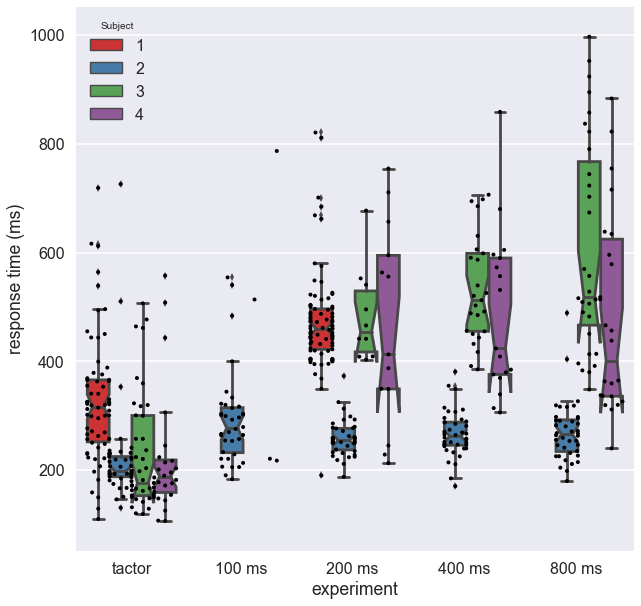

In [91]:
resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < 1000) & (result['response time (ms)'] > 100)]


frame7 = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frame7.get_legend_handles_labels()



frame7 = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#sns.set_palette
frame7.legend_.remove()

frame7.legend(handles, labels, loc="upper left", title="Subject")

fig7 = plt.gcf()
fig7.set_size_inches(10,10)
#fig7.savefig('swarmAndBoxSID_subj4.svg', dpi=600)
#fig7.savefig('swarmAndBoxSID_subj4.png', dpi=300)

AttributeError: 'FacetGrid' object has no attribute 'legend'

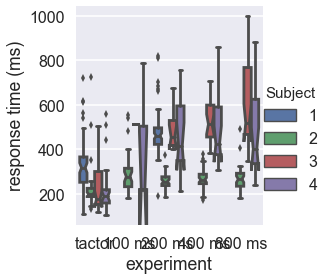

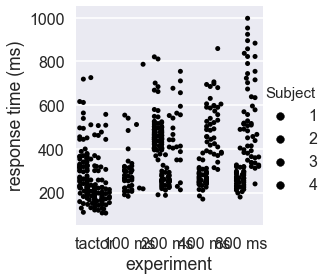

In [89]:
frame7 = sns.factorplot(x = 'experiment',y='response time (ms)',kind="box",notch=True ,hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#handles, labels = frame7.get_legend_handles_labels()
frame7 = sns.factorplot(x = 'experiment',y='response time (ms)',hue='Subject',kind="swarm",data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
#sns.set_palette
#frame7.legend_.remove()

frame7.legend(handles, labels, loc="upper left", title="Subject")

fig7 = plt.gcf()
fig7.set_size_inches(11.5, 11.5)
#fig7.savefig('swarmAndBoxSID.svg', dpi=600)

In [92]:
#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'tactor':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])

dataCleaned

C:\Users\djcald.CSENETID\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,experiment,response time (ms),Subject,block,sortCol
275,tactor,159.00672,1,1,a
276,tactor,320.10240,1,1,a
277,tactor,221.83936,1,1,a
278,tactor,450.47808,1,1,a
279,tactor,295.56736,1,1,a
280,tactor,496.23040,1,1,a
281,tactor,399.68768,1,1,a
282,tactor,314.94144,1,1,a
283,tactor,262.88128,1,1,a
284,tactor,340.70528,1,1,a


In [93]:
#dataCleaned = dataCleaned.sort('experiment')


typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))

dataCleaned[dataCleaned['experiment']=='tactor']

,experiment,response time (ms),Subject,block,sortCol,typeOrder
275,tactor,159.00672,1,1,a,False
276,tactor,320.10240,1,1,a,False
277,tactor,221.83936,1,1,a,False
278,tactor,450.47808,1,1,a,False
279,tactor,295.56736,1,1,a,False
280,tactor,496.23040,1,1,a,False
281,tactor,399.68768,1,1,a,False
282,tactor,314.94144,1,1,a,False
283,tactor,262.88128,1,1,a,False
284,tactor,340.70528,1,1,a,False


In [94]:
makeForMat = False

if makeForMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj.csv')


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='0') 

#dataCleaned=dataCleaned.assign(tryThis=dataCleaned.where(dataCleaned.experiment.isin(typeOrder)))

dataCleaned



,experiment,response time (ms),Subject,block,sortCol,typeOrder
275,tactor,159.00672,1,1,a,1
276,tactor,320.10240,1,1,a,1
277,tactor,221.83936,1,1,a,1
278,tactor,450.47808,1,1,a,1
279,tactor,295.56736,1,1,a,1
280,tactor,496.23040,1,1,a,1
281,tactor,399.68768,1,1,a,1
282,tactor,314.94144,1,1,a,1
283,tactor,262.88128,1,1,a,1
284,tactor,340.70528,1,1,a,1


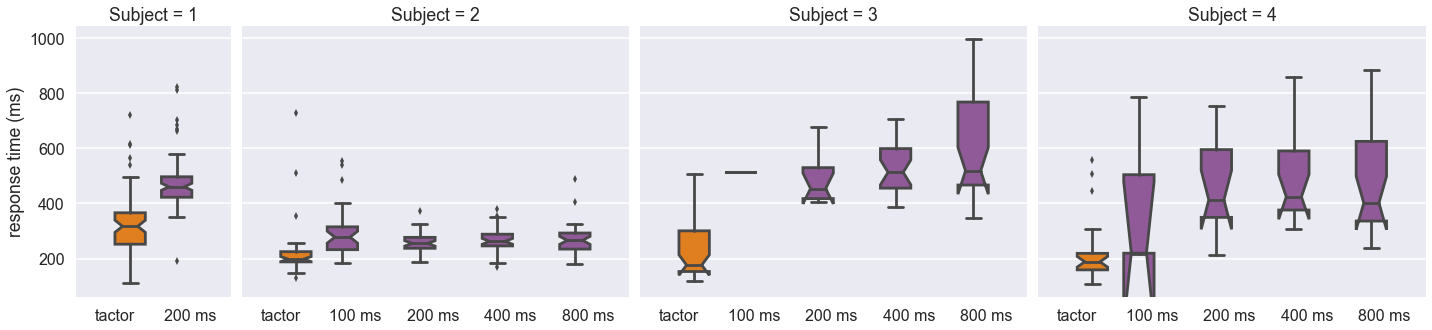

In [95]:
frame8 = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame8.map(sns.boxplot, "experiment","response time (ms)",'typeOrder',notch=True,palette=color_pal_2)
frame8.axes[0,0].set_xlabel('')
frame8.axes[0,1].set_xlabel('')
frame8.axes[0,2].set_xlabel('')
frame8.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('boxBySid_subj4.svg', dpi=600)

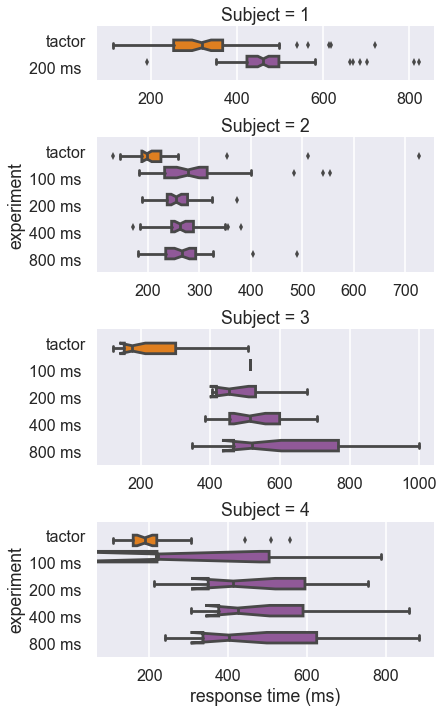

In [96]:

frame8 = sns.FacetGrid(data=dataCleaned,row='Subject',size=2.5, aspect=2.5,sharex=False,sharey=False,gridspec_kws={"height_ratios": [0.1, 0.25, 0.25,0.25]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

# plasma also looks cool 
frame8.map(sns.boxplot,"response time (ms)", "experiment",'typeOrder',notch=True,palette=color_pal_2)
frame8.axes[0,0].set_ylabel('')
frame8.axes[2,0].set_ylabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('boxBySid_row_v2.svg', dpi=600)

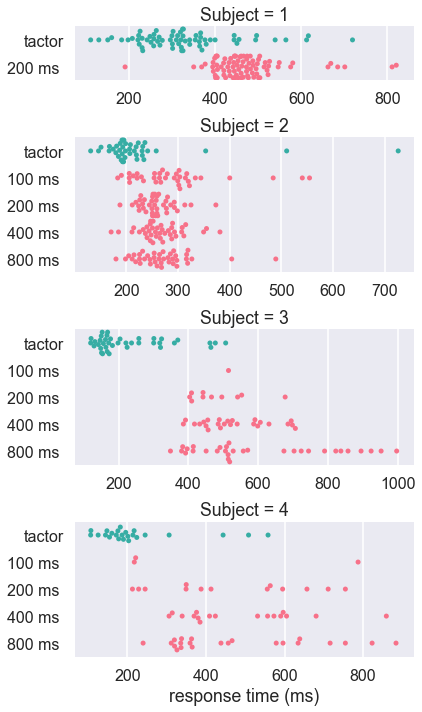

In [97]:


frame8 = sns.FacetGrid(data=dataCleaned,row='Subject',size=2.5, aspect=2.5,sharex=False,sharey=False,gridspec_kws={"height_ratios": [0.1, 0.25, 0.25,0.25]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame8.map(sns.swarmplot,"response time (ms)", "experiment",'typeOrder',palette='husl')
frame8.axes[0,0].set_ylabel('')
frame8.axes[1,0].set_ylabel('')
frame8.axes[2,0].set_ylabel('')
frame8.axes[3,0].set_ylabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('swarmBySid_row.svg', dpi=600)

In [10]:


frame8 = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame8.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frame8.axes[0,0].set_xlabel('')
frame8.axes[0,1].set_xlabel('')
frame8.axes[0,2].set_xlabel('')
frame8.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('swarmBySid_col_4subj.svg', dpi=600)
#fig9.savefig('swarmBySid_col_4subj.png', dpi=600)


NameError: name 'dataCleaned' is not defined

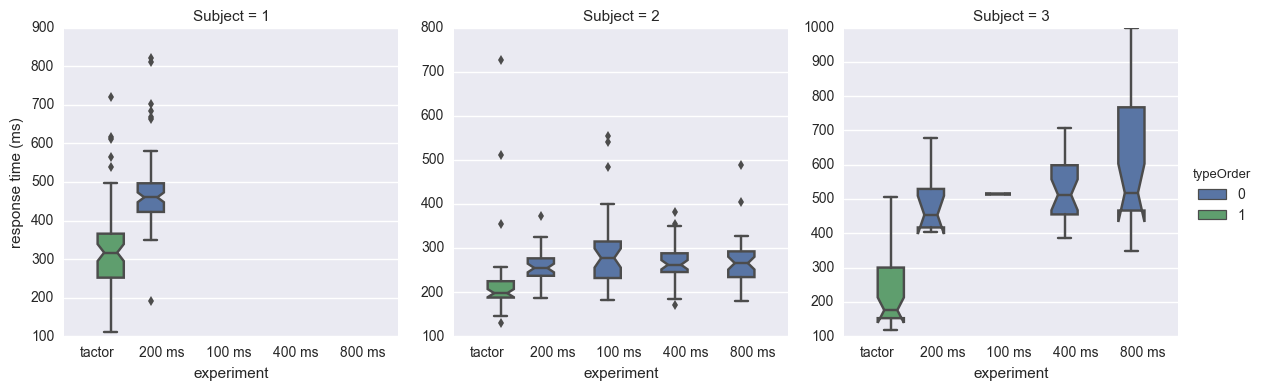

In [55]:

frame11 = sns.factorplot(x = 'experiment',y='response time (ms)',kind="box",notch=True 
                         ,col="Subject",hue='typeOrder',orient="v", data = dataCleaned,sharex=False,sharey=False
                         )


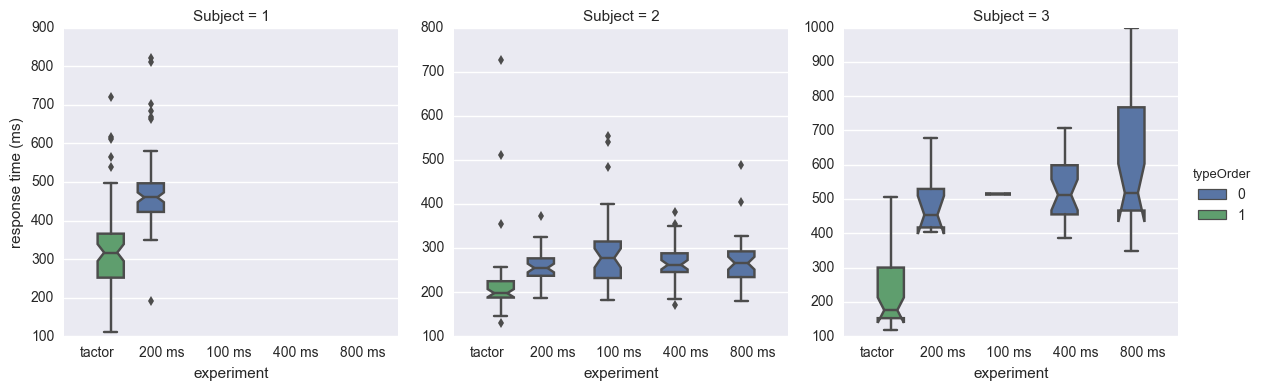

In [56]:

frame11 = sns.factorplot(x = 'experiment',y='response time (ms)',col='Subject',hue='typeOrder',
                         kind="box",notch=True ,orient="v", data = dataCleaned,sharex=False,sharey=False)


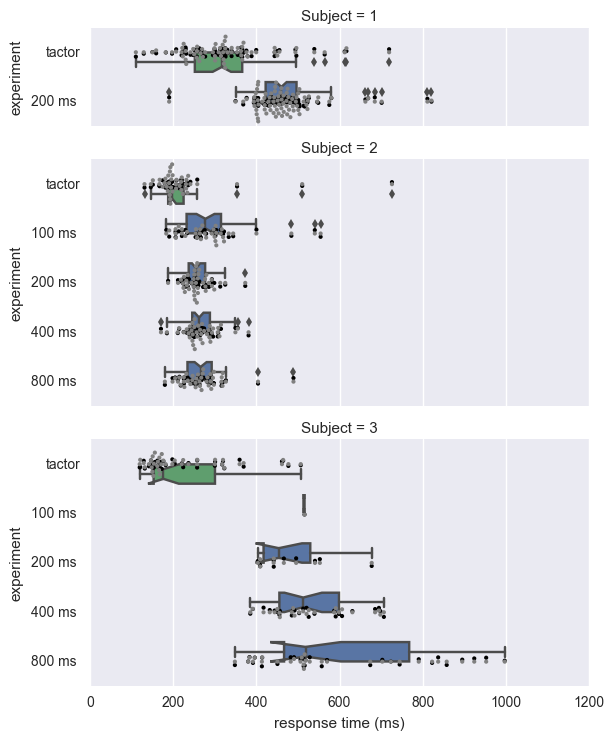

In [57]:


frame9 = sns.FacetGrid(data=dataCleaned,row='Subject',size=2.5, aspect=2.5,sharex=True,sharey=False,gridspec_kws={"height_ratios": [0.1, 0.25, 0.25]})
#frame8.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frame9.map(sns.boxplot,"response time (ms)", "experiment",'typeOrder',notch=True,palette='deep')

frame9.map(sns.stripplot,"response time (ms)", "experiment",'typeOrder',jitter=True,palette=['black'],size=3)
frame9.map(sns.swarmplot,"response time (ms)", "experiment",'typeOrder',palette=['grey'],size=3)

#frame9.axes[0,0].set_ylabel('')
#frame9.axes[2,0].set_ylabel('')

#dataCleaned['typeOrder']
fig9 = plt.gcf()

#fig9.savefig('swarmBySid_row.svg', dpi=600)

In [58]:
frame9 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frame10 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frame11 =sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v", notch=True,data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])

frame1 = sns.boxplot(x = 'experiment',y='response time (ms)',hue='Subject',orient="v",notch=True data = resultTrim,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '])


SyntaxError: invalid syntax (<ipython-input-58-4b51ba60e6a5>, line 5)

In [16]:
#sub1_tact = dataCleaned[experiment["tactor"]][Subject["1"]]
sub1_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='1')]['response time (ms)']
sub1_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='1')]['response time (ms)']
scipy.stats.kruskal(sub1_200,sub1_tact)

KruskalResult(statistic=60.533330840634605, pvalue=7.2343109020731671e-15)

In [17]:
sub2_100 = dataCleaned[(dataCleaned.experiment=='100 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_400 = dataCleaned[(dataCleaned.experiment=='400 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_800 = dataCleaned[(dataCleaned.experiment=='800 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='2')]['response time (ms)']
scipy.stats.kruskal(sub2_100,sub2_400,sub2_800,sub2_200,sub2_tact)

KruskalResult(statistic=48.672775765865822, pvalue=6.8325958392168827e-10)

In [18]:
sub3_100 = dataCleaned[(dataCleaned.experiment=='100 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_400 = dataCleaned[(dataCleaned.experiment=='400 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_800 = dataCleaned[(dataCleaned.experiment=='800 ms ') & (dataCleaned.Subject=='3')]['response time (ms)']
sub3_tact = dataCleaned[(dataCleaned.experiment=='tactor') & (dataCleaned.Subject=='3')]['response time (ms)']
scipy.stats.kruskal(sub3_100,sub3_400,sub3_800,sub3_200,sub3_tact)

KruskalResult(statistic=64.595859129181463, pvalue=3.1304346607123176e-13)

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = dataCleaned[dataCleaned.Subject=='3']['response time (ms)']
groupsStats = dataCleaned[dataCleaned.Subject=='3']['experiment']

tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()



group1,group2,meandiff,lower,upper,reject
100 ms,200 ms,-31.0231,-430.1937,368.1475,False
100 ms,400 ms,17.1475,-370.984,405.279,False
100 ms,800 ms,91.8839,-294.8003,478.568,False
100 ms,tactor,-283.3949,-668.8376,102.0479,False
200 ms,400 ms,48.1706,-94.2347,190.5759,False
200 ms,800 ms,122.907,-15.5049,261.3188,False
200 ms,tactor,-252.3718,-387.2767,-117.4668,True
400 ms,800 ms,74.7364,-27.5706,177.0434,False
400 ms,tactor,-300.5424,-398.0525,-203.0322,True
800 ms,tactor,-375.2787,-466.8582,-283.6993,True


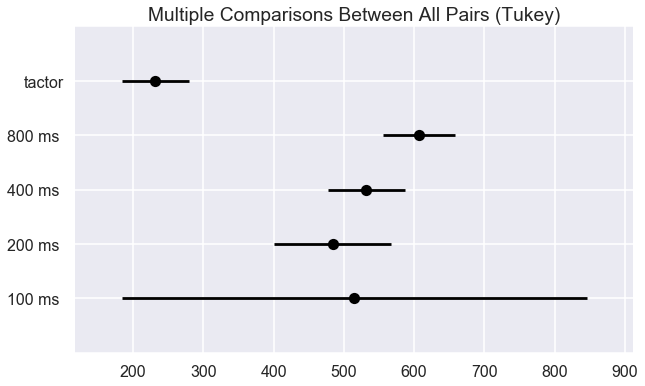

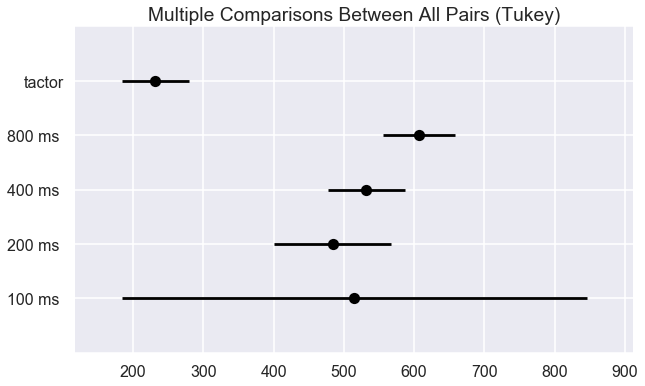

In [24]:
tukey.plot_simultaneous()    # Plot group confidence intervals


In [26]:
dataStats = dataCleaned[dataCleaned.Subject=='2']['response time (ms)']
groupsStats = dataCleaned[dataCleaned.Subject=='2']['experiment']

dataStats

tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()

group1,group2,meandiff,lower,upper,reject
100 ms,200 ms,-33.6711,-76.9952,9.6531,False
100 ms,400 ms,-25.4862,-68.8104,17.8379,False
100 ms,800 ms,-21.4476,-64.7717,21.8766,False
100 ms,tactor,-68.229,-111.5532,-24.9048,True
200 ms,400 ms,8.1848,-33.9838,50.3535,False
200 ms,800 ms,12.2235,-29.9452,54.3921,False
200 ms,tactor,-34.558,-76.7266,7.6107,False
400 ms,800 ms,4.0387,-38.13,46.2073,False
400 ms,tactor,-42.7428,-84.9114,-0.5741,True
800 ms,tactor,-46.7814,-88.9501,-4.6128,True


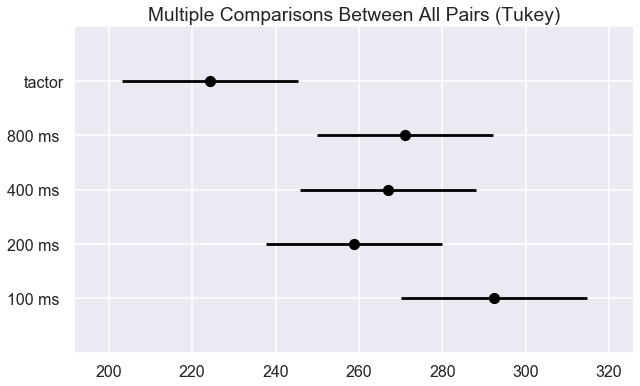

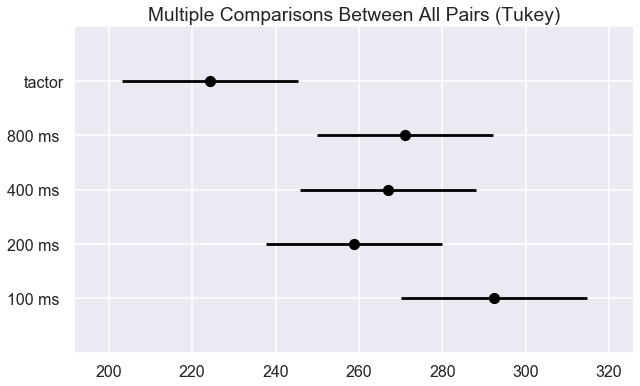

In [27]:
tukey.plot_simultaneous()    # Plot group confidence intervals


In [ ]:
sub2_100 = dataCleaned[(dataCleaned.experiment=='100 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']
sub2_200 = dataCleaned[(dataCleaned.experiment=='200 ms ') & (dataCleaned.Subject=='2')]['response time (ms)']

In [ ]:
scipy.stats.normaltest(sub2_tact)
sns.distplot(sub2_100)

In [ ]:
# convert Pandas Data Frame to CSV, then read into matlab, resave
resultTrim.to_csv('resultTrim.csv', sep=',')

In [ ]:
resultTrim.hist()

In [ ]:
fig, ax = plt.subplots()
for a in resultTrim.columns:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

In [ ]:
#from bokeh.charts import BoxPlot, show
#from bokeh.sampledata.autompg import autompg as df
#output_notebook


In [ ]:

p = BoxPlot(resultTrim, values='response times', label=['sid','experiment'],color='experiment',
            title="Response Times")

show(p)

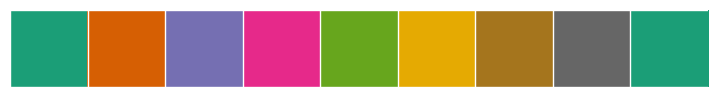

In [98]:
a=sns.choose_colorbrewer_palette('qualitative')

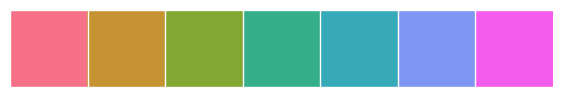

In [92]:
sns.palplot(sns.color_palette("husl", 7))

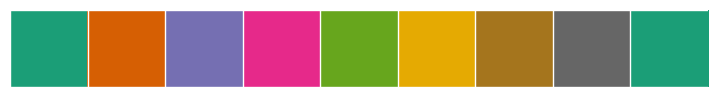

In [102]:
sns.palplot(a)

In [99]:
a[1:3]

[(0.84221454166314191, 0.37545560177634735, 0.013241061612087046),
 (0.46057670373542625, 0.4381238021686964, 0.70133027539533721)]